In [1]:
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1835,ham,* Will be september by then!,NaN,NaN,NaN
2845,ham,Wat time u finish ur lect today?,NaN,NaN,NaN
50,ham,What you thinked about me. First time you saw ...,NaN,NaN,NaN
2087,ham,\alright babe,justthought i��d sayhey! how u doin?nearly th...,NaN,NaN
769,ham,Lol I know! They're so dramatic. Schools alrea...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

1. Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.sample(5)

,v1,v2
701,ham,"Sorry, I'll call later"
4807,ham,What's up my own oga. Left my phone at home an...
505,ham,No it's waiting in e car dat's bored wat. Cos ...
706,ham,So when do you wanna gym harri
1709,ham,U meet other fren dun wan meet me ah... Muz b ...


In [6]:
df.rename(columns={
    "v1": "target",
    "v2": "text"
}, inplace=True)

In [7]:
df.sample(5)

,target,text
2747,ham,Ya had just now.onion roast.
4577,spam,Urgent! call 09066350750 from your landline. Y...
683,spam,Hi I'm sue. I am 20 years old and work as a la...
2187,ham,Oh god. I'm gonna Google nearby cliffs now.
724,ham,The world is running and i am still.maybe all ...


In [8]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [10]:
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep="first")

In [19]:
df.shape

(5169, 2)

2. EDA

In [15]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


([<matplotlib.patches.Wedge at 0x7db8ae679d60>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

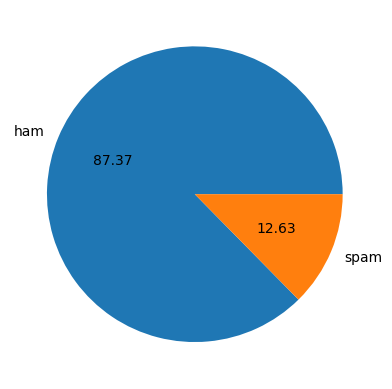

In [17]:
import matplotlib.pyplot as plt

plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")

In [47]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [18]:
import nltk


nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /home/phuhuy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
df["num_characters"]= df["text"].apply(len)

In [20]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:

df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[["num_characters", "num_sentences", "num_words"]].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.924163,1.966531,18.456761
std,58.175349,1.449833,13.325633
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [30]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


<Axes: xlabel='num_characters', ylabel='Count'>

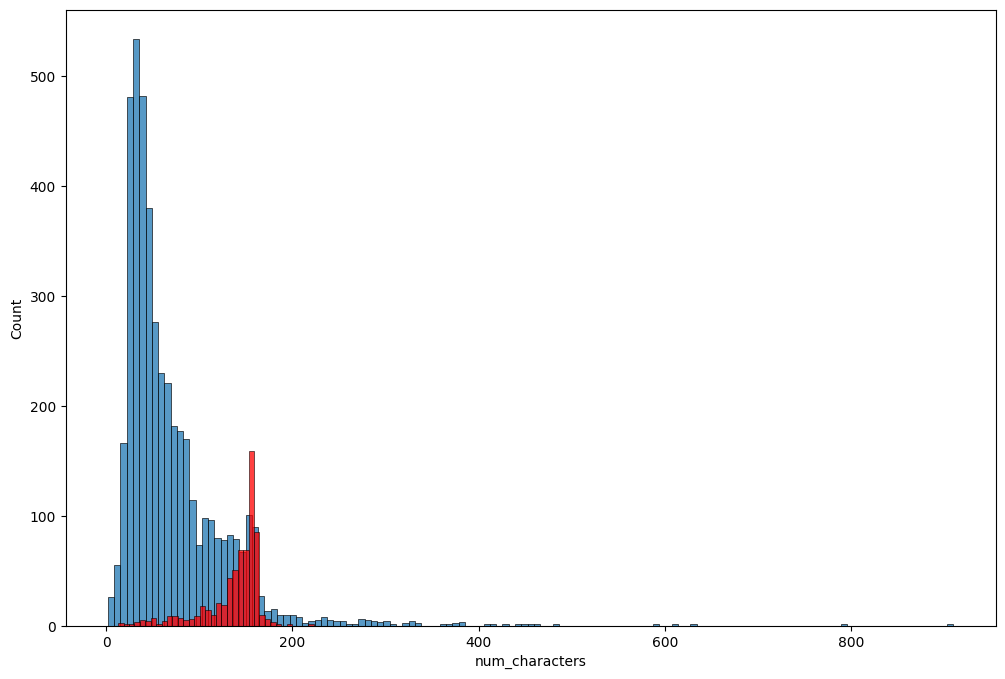

In [26]:
import seaborn as sns


plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color="red")


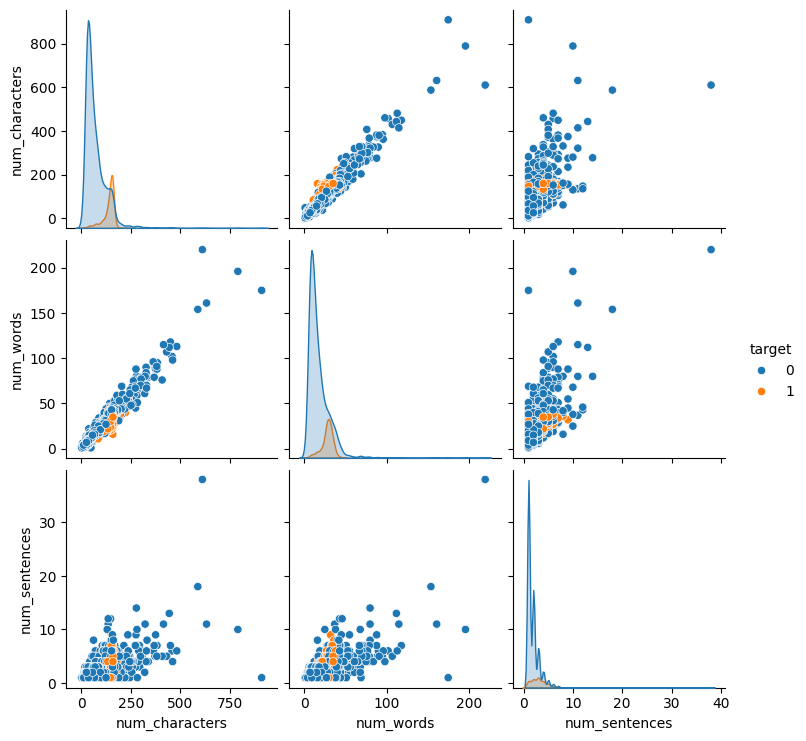

In [27]:
sns.pairplot(df, hue="target")

<Axes: >

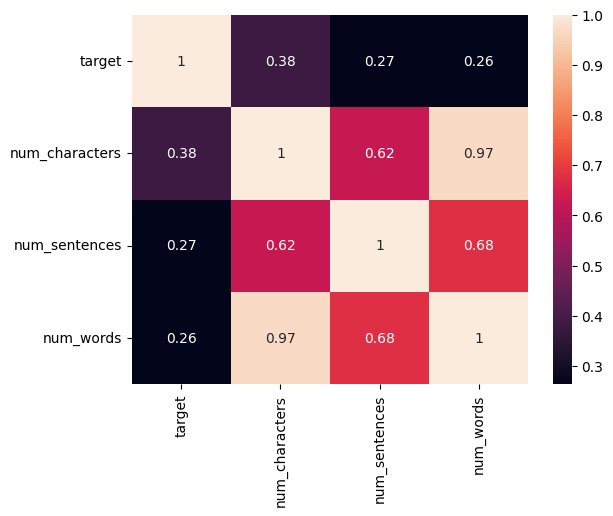

In [28]:
sns.heatmap(df[["target", "num_characters", "num_sentences", "num_words",]].corr(), annot=True)

3. Preprocessing
   - lower case
   - tokenization
   - removing stop words and punctuation
   - stemming

In [29]:
from nltk.corpus import stopwords

nltk.download("stopwords")

print(stopwords.words("english"))

import string
string.punctuation

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

ps.stem("playing")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/phuhuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'play'

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text: 
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [31]:
df["transformed_text"] = df["text"].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 942.9 kB/s eta 0:00:00:--:--

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [33]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [34]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

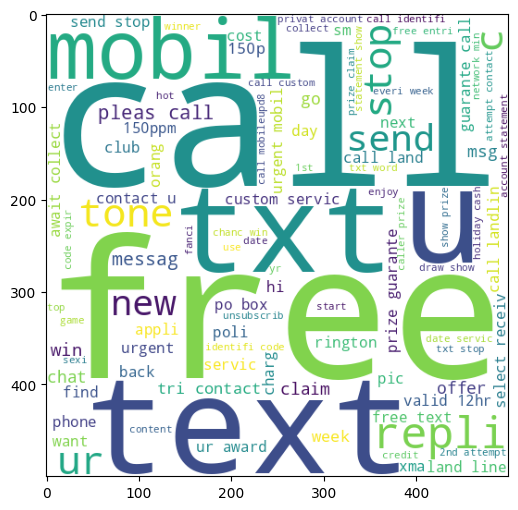

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))


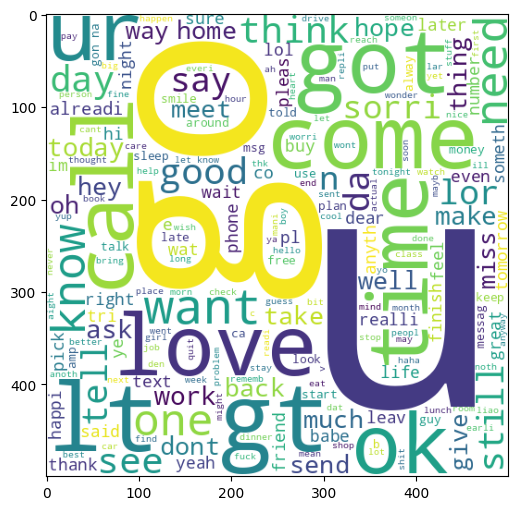

In [37]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4. model building

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [42]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [43]:
X.shape

(5169, 3000)

In [44]:
y = df["target"].values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[788 108]
 [ 25 113]]
0.5113122171945701


In [51]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [52]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#tfidf => MNB

In [111]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 430.4 kB/s eta 0:00:0000:0100:16
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 865.7 kB/s eta 0:00:0000:0100:06

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [59]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [60]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb
}

In [53]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [62]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"{name}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}")
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

SVC: Accuracy = 0.97, Precision = 0.97
KN: Accuracy = 0.90, Precision = 1.00
NB: Accuracy = 0.96, Precision = 1.00
DT: Accuracy = 0.94, Precision = 0.84
LR: Accuracy = 0.95, Precision = 0.94
RF: Accuracy = 0.97, Precision = 0.99
AdaBoost: Accuracy = 0.92, Precision = 0.84
BgC: Accuracy = 0.96, Precision = 0.86
ETC: Accuracy = 0.98, Precision = 0.99
GBDT: Accuracy = 0.95, Precision = 0.93
xgb: Accuracy = 0.97, Precision = 0.96


In [63]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [64]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.976789,0.991379
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
10,xgb,0.971954,0.957983
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538
6,AdaBoost,0.924565,0.840909


In [65]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [66]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,ETC,Accuracy,0.976789
3,RF,Accuracy,0.970019
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.971954
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.951644
8,BgC,Accuracy,0.957447
9,AdaBoost,Accuracy,0.924565


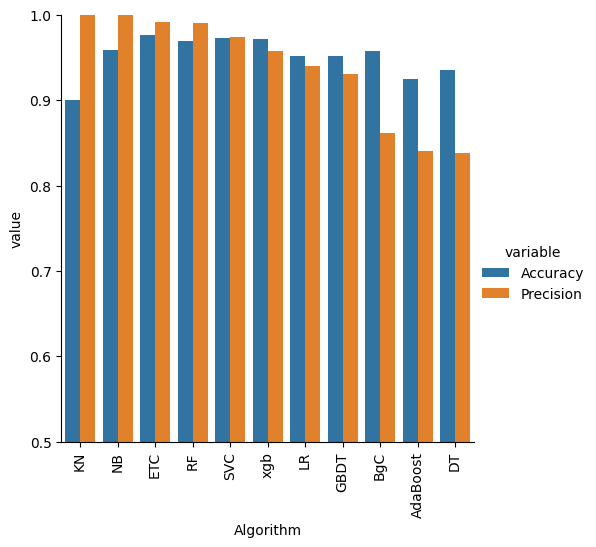

In [67]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [70]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [71]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [73]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,RF,0.970019,0.990826,0.970019,0.990826,0.970019,0.990826,0.970019,0.990826
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,xgb,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983
6,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
7,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
8,BgC,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538
9,AdaBoost,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909


In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [76]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [77]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [78]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9914529914529915


In [79]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [54]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))